https://journal.r-project.org/archive/2011-1/RJournal_2011-1_South.pdf
https://cran.r-project.org/web/packages/rworldmap/rworldmap.pdf


In [1]:
library(ncdf4)
library(RColorBrewer)
library(rworldmap)

Loading required package: sp
### Welcome to rworldmap ###
For a short introduction type : 	 vignette('rworldmap')


In [2]:
urlpath='http://mrtee.europa.renci.org:8080/thredds/dodsC/DataLayers/'
filen='JPL.ECCO2.SSH.1440x720.20140917.nc'
url=paste(urlpath, filen,sep='')

In [3]:
nc=nc_open(url)
lon=ncvar_get(nc,"LONGITUDE_T")
lon <- lon-180
lat=ncvar_get(nc,"LATITUDE_T")
ssh=ncvar_get(nc, "SSH")

# reverse the y values
ssh <-ssh[ ,nc$dim$LATITUDE_T$len:1 ]

# swap east and west hemispheres
i=nc$dim$LONGITUDE_T$len/2;
s2 <- ssh[1:i , ]
s1 <- ssh[(i+1):(i*2) , ]
ssh2 <- rbind(s1, s2)

In [4]:
# create gridTopology from the netCDF metadata
offset = c(min(lon),min(lat))
cellsize = c( abs(diff(lon[1:2])), abs(diff(lat[1:2])))

# add cellsize/2 to offset
# to convert from lower left referencing to centre
offset = offset + cellsize/2
cells.dim = c(nc$dim$LONGITUDE_T$len, nc$dim$LATITUDE_T$len)

gt <- GridTopology(cellcentre.offset = offset,
                   cellsize = cellsize,
                   cells.dim = cells.dim )

In [5]:
#create a vector to classify the data
catMethod=seq(from=-2,to=2,by=.1)

#create a colourPalette for all plots
#-ve blue, 0 white, +ve yellow to red
colourPalette=c('blue','lightblue','white',brewer.pal(9,'YlOrRd'))

#create a spatialGridDataFrame
gridVals <-data.frame(att=as.vector(ssh2))
sGDF <-SpatialGridDataFrame(gt, data=gridVals)

Warning message in rwmGetColours(colourPalette, numColours):
"12 colours specified and 40 required, using interpolation to calculate colours"

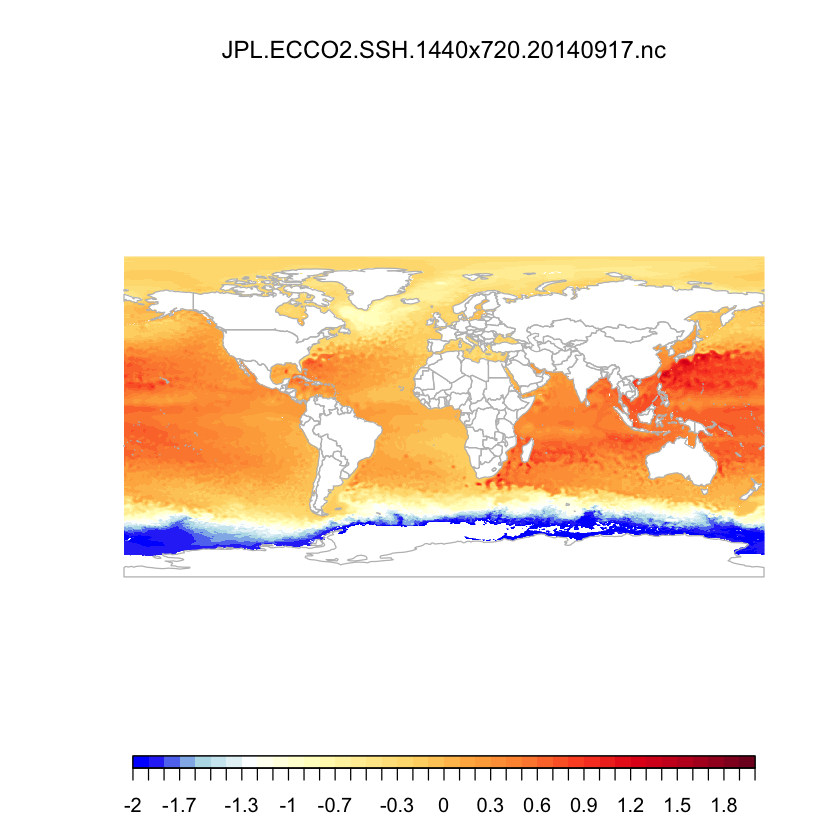

In [6]:
mapParams <- mapGriddedData(sGDF,
                            nameColumnToPlot='att',
                            catMethod=catMethod,
                            colourPalette=colourPalette,
                            addLegend=FALSE)
#adding formatted legend
do.call(addMapLegend, c(mapParams, legendLabels="all", legendWidth=0.5, legendMar = 3))

title(filen)